In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()
# print first 5 rows in the dataframe

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

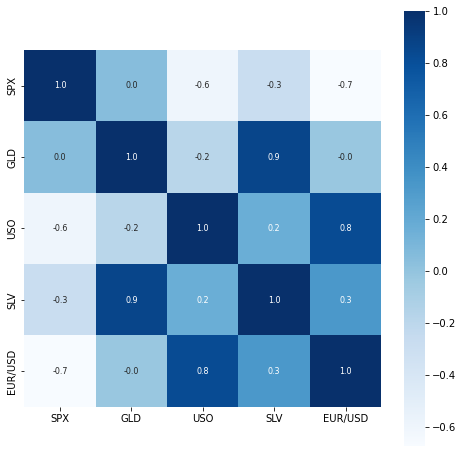

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Sumukh.G\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

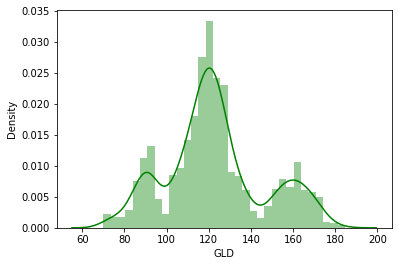

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [13]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [18]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [19]:
print(test_data_prediction)

[168.68359887  81.97840008 116.16179996 127.60480095 120.75200159
 154.6398976  150.23699883 126.07920005 117.41309859 125.76480109
 116.6765008  171.40710084 141.86909809 167.94919813 114.99240009
 117.33170065 137.33420302 169.67390064 159.9709035  159.58029882
 155.14300026 125.54009985 175.41940046 156.9932033  125.16820072
  93.7553997   77.47530003 120.15500001 119.09659959 167.46959945
  88.08810059 125.24970009  90.98180035 117.76260021 121.02149899
 137.40860112 115.43860107 115.09990064 147.22859972 106.86970117
 103.86670233  87.27159786 126.38310076 117.84600015 153.12589863
 119.32950055 108.31649993 108.17019811  93.20620067 127.12899771
  75.51590019 113.66119923 121.44430031 111.23039921 118.97559913
 120.53059933 159.49010075 168.05450148 146.86879714  85.94439855
  94.13270047  86.89779899  90.57009992 119.0341008  126.37340048
 127.59979942 170.36610096 122.33669904 117.32319879  98.42490075
 168.12090165 143.0989986  131.29480186 121.17100249 120.39509988
 119.74300

In [20]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989098022436504


In [21]:
Y_test = list(Y_test)

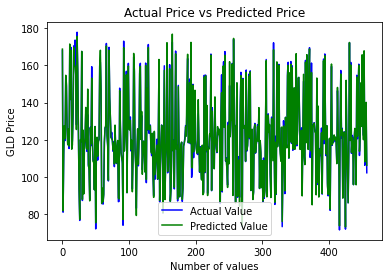

In [22]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [23]:
import pickle

In [24]:
with open('pickle_demo','wb') as file:
    pickle.dump(regressor,file)


In [25]:
#with open('pickle_demo','rb') as file:
 #   demo=pickle.load(file)
    

In [26]:
#print(demo)